# Evaluate Risk of Stock Return Using Normal Distribution

## Objective
We can model daily stock return using normal distribution. We have a large collection of data return from historic data. We can compute the parameter mean and and standard deviation in this collection. The interesting part is, if we transform log form, the distribution is not same as normal distribution, but it close enough.

Then, with calculate area under curve we can calculate the probability of losing or gaining in a certain percentage in one day. Using CDF (cummulative density function) of normal distribution we can calculate the risk. 

Let X is random variabel for daily return of stock X.
How many probability in single day stock X will lose more than 5%?
then with CDF we simply find the value for P(X < -0.05) or 1 - P(X > -0.05)

## Case Study
If talk about risk, then we talk about loss on stock trading. 
Let say we as trader has loss tolerance around ~15% a years. 

In this case we will evaluate that BBCA will drop 15% in next 1 years. 

Stock Code: BBCA (IDX Market)

Data Period : Jan 1, 2019 - Dec 31, 2019

Problem Statement:
1. Probability BBCA drop 5% in a single day
2. Probability BBCA gain 5% in a single day
3. How likely the stock price of BBCA were dropped over 15% in 1 year (has 220 trading days)


In [39]:
# to handle dataset
import pandas as pd
import datetime as dt
import numpy as np

#to simulate normal distribution
from scipy.stats import norm

#to visualize
import matplotlib.pyplot as plt
%matplotlib inline

#to crawl stock data
import pandas_datareader.data as web

In [2]:
# load data BBCA since 2019 until first 2020
start = dt.datetime(2019,1,1)
#end = dt.datetime.now() #exclude anomalies due to covid-19
end = dt.datetime(2020,1,1)

bbca = web.DataReader("BBCA.JK", 'yahoo', start,end)
print(bbca.head())

               High      Low     Open    Close      Volume     Adj Close
Date                                                                    
2019-01-01  26000.0  26000.0  26000.0  26000.0         0.0  25246.753906
2019-01-02  26225.0  26000.0  26000.0  26200.0   7191200.0  25440.958984
2019-01-03  26100.0  25575.0  26000.0  25900.0  14471600.0  25149.652344
2019-01-04  26025.0  25625.0  25875.0  26025.0  10293000.0  25271.031250
2019-01-07  26625.0  26225.0  26325.0  26225.0  14687600.0  25465.236328


### Distribution of LogRetrun

In [3]:
# calculating the log return
bbca['LogReturn'] = np.log(bbca['Close']).shift(-1) - np.log(bbca['Close'])

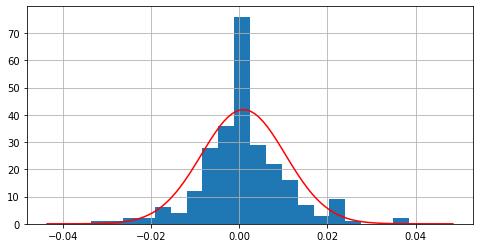

In [8]:
# estimate parameter mu and sigma
mu = bbca['LogReturn'].mean()
sigma = bbca['LogReturn'].std(ddof=1)

#generate normal distribution with parameter mu and sigma
density = pd.DataFrame()
density['x'] = np.arange(bbca['LogReturn'].min()-0.01,
                         bbca['LogReturn'].max()+0.01,
                        0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

#plot histogram to show distribution log return bbca
bbca['LogReturn'].hist(bins=20, figsize =(8,4))
plt.plot(density['x'], density['pdf'], color='red')


### Calculate the probability of stock will drop a certain percentage in a day

In [14]:
# Probability that the stock price of BBCA will drop over 5% in a day
prob_drop1 = norm.cdf(-0.05, mu, sigma)
print('The probability price drop >5% is ', prob_drop1)

The probability price drop >5% is  4.281117650482636e-08


In [15]:
# otherwise, that the stock price of BBCA will gain over 5% in a day
prob_gain1 = 1- norm.cdf(0.05, mu, sigma)
print('The probability price gain >5% is ', prob_gain1)

The probability price gain >5% is  1.3058504377827518e-07


### Calculate the probability of the stock price will drop over a certain percentage in a certain days


In [41]:
# drop over 10% in 100 trading days
mu100 = 100*mu
sigma100 = (100**0.5)*sigma
drop10_100 = norm.cdf(-0.10, mu100, sigma100)
print ('The probability of dropping over 10% in 100 days is ',drop10_100)

The probability of dropping over 10% in 100 days is  0.01889162283265252


In [43]:
# drop over 15% in 220 trading days
mu220 = 220*mu
sigma220 = (220**0.5)*sigma
drop15_220 = norm.cdf(-0.15, mu220, sigma220)
print ('The probability of dropping over 15% in a year is ',drop15_220)

The probability of dropping over 15% in a year is  0.00486555996441276


However, on case above we make assumption that daily return are independent which is quite wrong. 

To get the parameter mean and variance of a year return, we have formulas for sum of variabels. We need the independence when we compute the variance. If the data returns independent the variance of a unit return is equal to the sum of a variance of 22o daily return.

Finding quantiles of the normal distribution is a common task when performaning statistical test in the financial risk management. In finance related to the quantile there is an important risk measure value of risk or VaR. It estimates how much a set of investments might lose with a given probability.

# Calculate Value at Risk (VaR)
VaR is typically used by firms and the regulators in the financial industry to gauge the amount of assess needed to cover possible loss.

In [33]:
#calculate VaR
VaR = norm.ppf(0.05, mu, sigma) #ppf stand for percent point function
print('Single day value at risk ', VaR)

Single day value at risk  -0.01468129553887808


In [37]:
# Quantile
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))

#95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.01468129553887808
95% quantile  0.0166362183790845


5% of quantile of daily return is called a 95% VaR. From result above 95% VaR is -0.01468. 
It means with the 5% chance that daily return is worse than -1.4% (loss 1.4%).